# What is the infrared sky background?

Here we use the data from Oliva+ (2015) to compute the inter-line sky background.


In [37]:
import numpy as np
import os
%matplotlib inline
from pylab import *

import astropy
from astropy.convolution import convolve


Read in the night sky spectrum from Oliva 2015

In [153]:
dat = np.loadtxt("data/Oliva2015/table4.dat")
ll,ss = dat.T

mosdat = np.loadtxt("data/Mosfire-sky-background/mosfire-130429.dat")
llm, ssm = mosdat.T
llm = (llm*1.62695+14500-1.62695)


Filter curves from MOSFIRE bandpass definitions

In [154]:
Y = "Y" ; J = "J" ; H = "H" 

filters = {Y: (.972, 1.124), J: (1.153, 1.352), H: (1.466, 1.807)}

Make the luminosity specific in wavelength

## compare to paper


![alt text](fig3.png "Title")


(-1, 5)

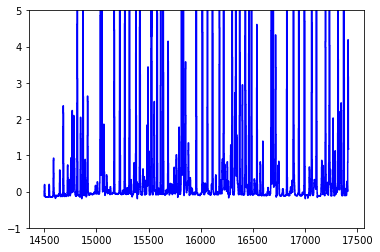

In [155]:
step(llm, (ssm-np.median(ssm))/1000, 'b')
ylim(-1,5)    


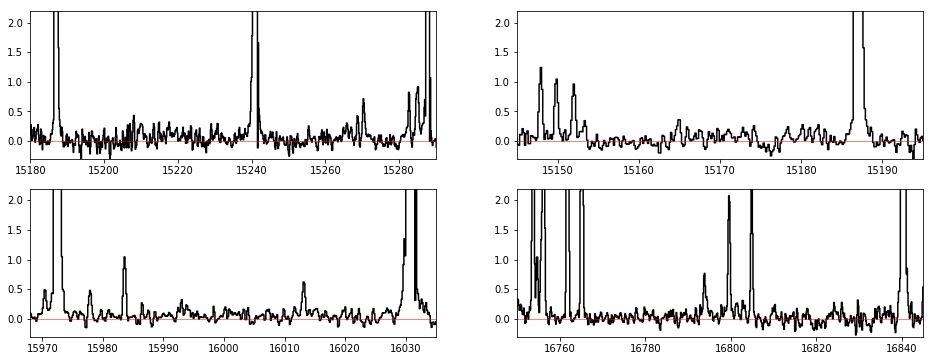

In [161]:
fig = figure(figsize=(16,6))

locs = [(15180, 15290), (15145, 15195), (15968, 16035), (16750, 16845)]

for ix, loc in enumerate(locs):
    subplot(2,2,ix+1)
    step(ll, ss, 'k')

    axhline(0, color='r', lw=.5)
    xlim(*loc)
    ylim(-.3,2.2)


# Now convolve down the spectrum - Compare MOSFIRE to GIANO

In [240]:
kernel = astropy.convolution.Box1DKernel(width=60)

In [241]:
ss_smooth = convolve(ss, kernel)

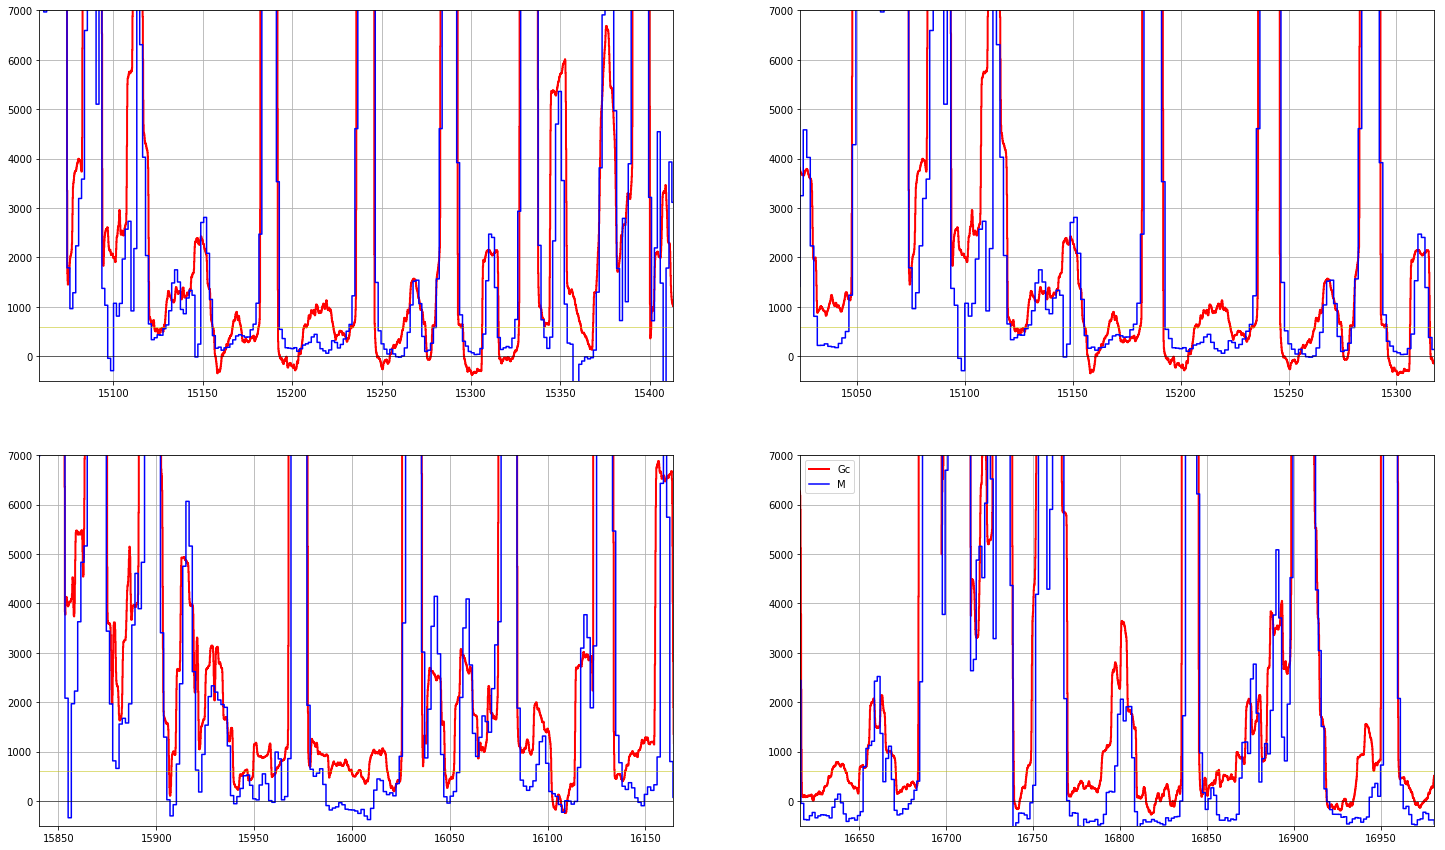

In [252]:
fig = figure(figsize=(25,15))

angs_to_mic = 1e4
locs = [(15180, 15290), (15145, 15195), (15968, 16035), (16750, 16845)]

F = .992
zpt = np.percentile(ssm,25)

for ix, loc in enumerate(locs):
    subplot(2,2,ix+1)
    #step(ll, ss*angs_to_mic/10, 'k', lw=1)
    step(ll, ss_smooth*angs_to_mic, 'r', lw=2)
    step(llm+16, (ssm-zpt)*13, 'b')

    axhline(0, color='k', lw=.5)
    axhline(600, color='y', lw=.5)
    
    xlim(loc[0]*F, loc[1]/F)
    ylim(-500,7000)
    grid(True)

legend(["Gc", "M"])



Note in the figure above the zero-point of the MOSFIRE spectra don't match the zero-point of GIANO well; however, very little care was taken to zeropoint the MOSFIRE spectra, so I tend to trust the GIANO results.